# Domaći zadatak 
## Autor: Saša Pejašinović

2.Realizacija comb funkcije.

In [1]:
import numpy as np
def comb(g,d):
    b=np.zeros(d+1)
    a=np.zeros(d+1)
    a[0]=b[d]=1
    a[d]=-g
    return b,a

3. Koristeći funkciju iz tačke 2 (comb funkciju), odrediti koeficijente funkcije prenosa filtra 
za g = 0,7 i d = 600. Nacrtati amplitudnu i faznu karakteristiku ovog
filtra.<br>
<b>Frekvencija izracunavanja fsc mora biti sto veca, za manje frekvencije ne dobija se tacan grafik . Potrebno uvecati grafik </b>

<IPython.core.display.Javascript object>


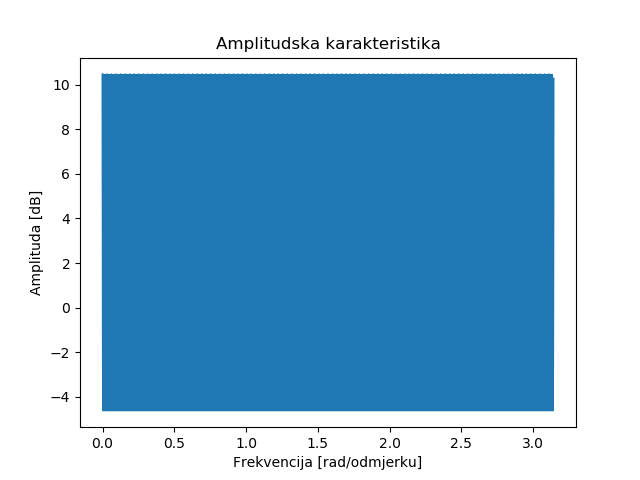

<IPython.core.display.Javascript object>


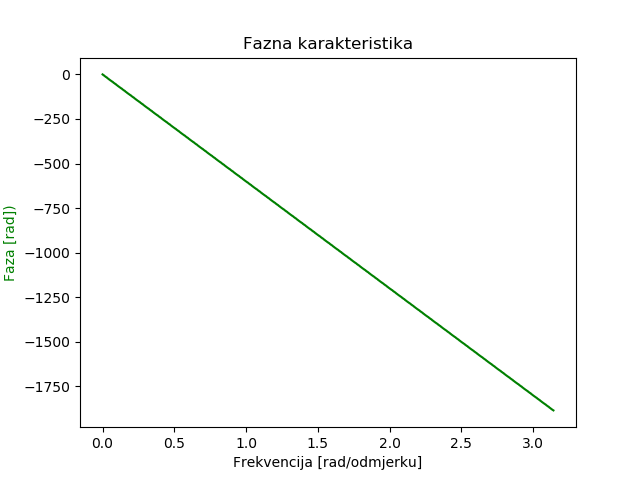

In [2]:
from freq_plot import freq_plot
import scipy.signal as signal
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile
%matplotlib notebook

g=0.7
d=600
b,a=comb(g,d)
fsc=25000
w,H=signal.freqz(b,a,worN=fsc)
freq_plot(w,H,'comb(0.7,600)')


5. Realizacija lcomb funkcije.

In [3]:
import numpy as np
def lcomb(g1,g,d):
    b=np.zeros(d+2)
    a=np.zeros(d+1)
    a[0]=b[d]=1
    a[1]=b[d+1]=-g1
    a[d]=-g*(1-g1)
    return b,a

6. Koristeci funkciju iz tacke 5, odrediti koeficijente funkcije prenosa filtra za g1 = 0,24, g = 0,83 i d = 600. Nacrtati amplitudnu i faznu
karakteristiku ovog filtra.


In [4]:
g1=0.24
g=0.83
d=600
b,a=lcomb(g1,g,d)
w,H=signal.freqz(b,a,worN=fsc)

<IPython.core.display.Javascript object>


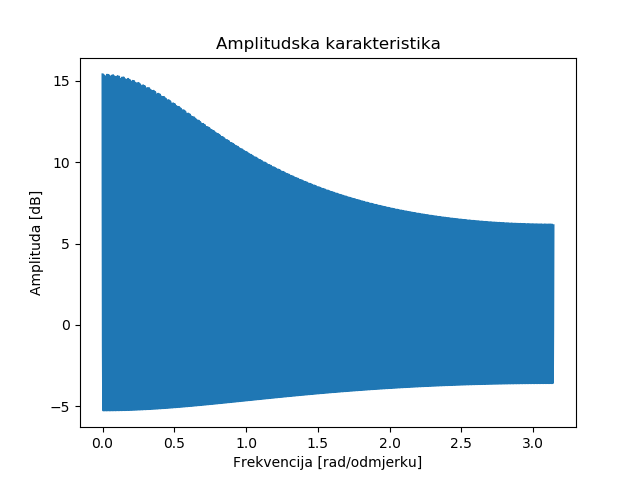

<IPython.core.display.Javascript object>


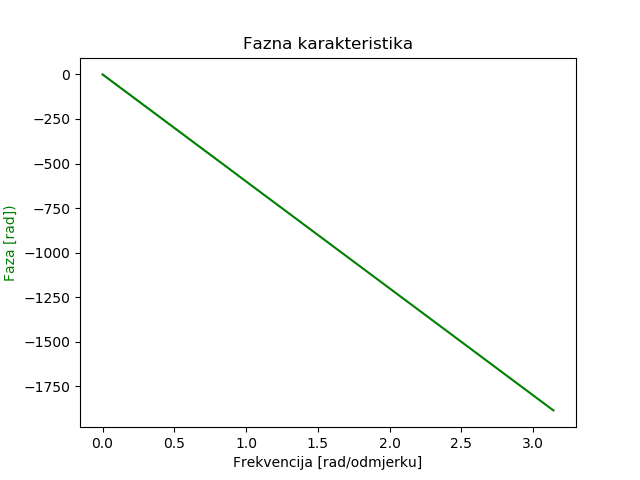

In [5]:
freq_plot(w,H,'lcomb(0.24,0.83,600)')

8.Realizacija allpass funkcije.

In [6]:
import numpy as np
def all_pass(g,d):
    b=np.zeros(d+1)
    a=np.zeros(d+1)
    a[0]=b[d]=1
    b[0]=a[d]=g
    return b,a

9. Koristeci funkciju iz tacke 8, odrediti koeficijente funkcije prenosa filtra
za g = 0,7 i d = 100. Nacrtati amplitudnu i faznu karakteristiku ovog
filtra.

<IPython.core.display.Javascript object>


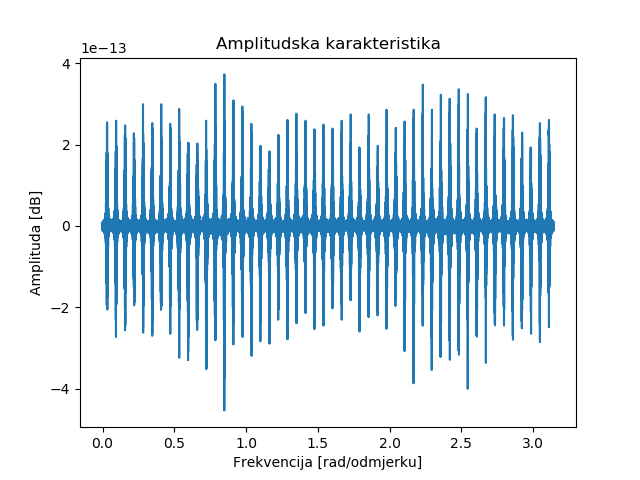

<IPython.core.display.Javascript object>


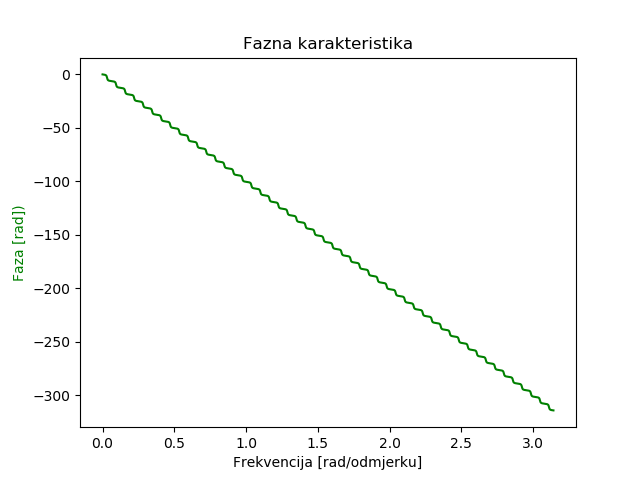

In [7]:
b,a=all_pass(0.7,100)
w,H=signal.freqz(b,a,worN=fsc)
freq_plot(w,H,'allpass')

11. Realizacija tld funkcije.

In [8]:
def tdl(g,d):
    b=np.zeros(d[-1]-d[0]+1)
    for i in range(len(d)):
        b[d[i]-d[0]]=g[i]
    return b,np.array([1])

12.Koristeci funkciju iz tacke 11, odrediti koeficijente funkcije prenosa
filtra za vrijednosti parametara g i d date u Tabeli 1. Obratite paznju
da su u tabeli kasnjenja data u sekundama i da ih je potrebno pretvoriti
u kasnjenja izrazena brojem odmjeraka. Nacrtati amplitudnu i faznu
karakteristiku ovog filtra.

<IPython.core.display.Javascript object>


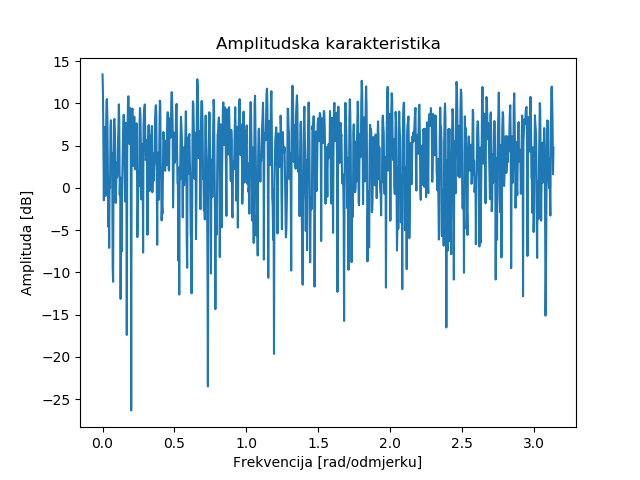

<IPython.core.display.Javascript object>


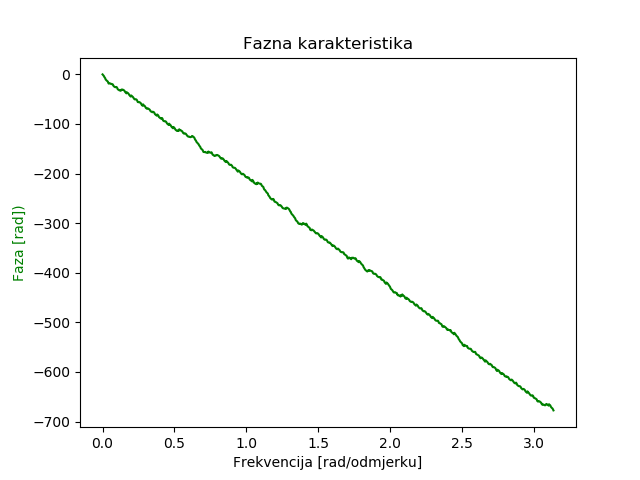

In [9]:
fs, x = wavfile.read('acoustic.wav')
ld=fs*np.array([0,0.0199,0.0354,0.0389,0.0414,0.0699,0.0796])
lg=np.array([1,1.02,0.818,0.635,0.719,0.267,0.242])
ld=ld.astype(int)
b,a=tdl(lg,ld)
w,H=signal.freqz(b,a,1024)
freq_plot(w,H,'TLD')

13. Realizacija moorer funkcije

In [10]:
#pomocne funkcije za racunanje koeficijenata ekvivalentnog sistema
def series_eq(b1,a1,b2,a2):
    return np.polymul(b1[::-1],b2[::-1])[::-1],np.polymul(a1[::-1],a2[::-1])[::-1]
def parallel_eq(b1,a1,b2,a2):
    return np.polyadd(np.polymul(b1[::-1],a2[::-1]),np.polymul(b2[::-1],a1[::-1]))[::-1],np.polymul(a1[::-1],a2[::-1])[::-1]
#moorer 
def moorer(lg,ld,cg,cg1,cd,ag,ad,d):
    
    b,a=lcomb(cg1[0],cg,cd[0])
    for i in range(1,len(cd)):
        b,a=parallel_eq(b,a,*lcomb(cg1[i],cg,cd[i]))
    
    b,a=series_eq(b,a,*all_pass(ag,ad))
    b,a=series_eq(b,a,np.concatenate((np.zeros(d),[1])),[1])
    b,a=parallel_eq(b,a,[1],[1])
    b,a=series_eq(b,a,*tdl(lg,ld))
    
    return b,a

14. Koristeci funkciju iz tacke 13, odrediti koeficijente funkcije prenosa
Murerovog reverberatora

In [11]:
cd=(10**-3)*fs*np.array([50,56,61,68,72,78])
cg=0.83
cg1=np.array([0.24,0.26,0.28,0.29,0.30,0.32])
cd=cd.astype(int)
ag=0.7
ad=67
d=ld[-1]-cd[0]
b,a=moorer(lg,ld,cg,cg1,cd,ag,ad,d)


15. Odrediti i nacrtati impulsni odziv reverberatora.

<IPython.core.display.Javascript object>


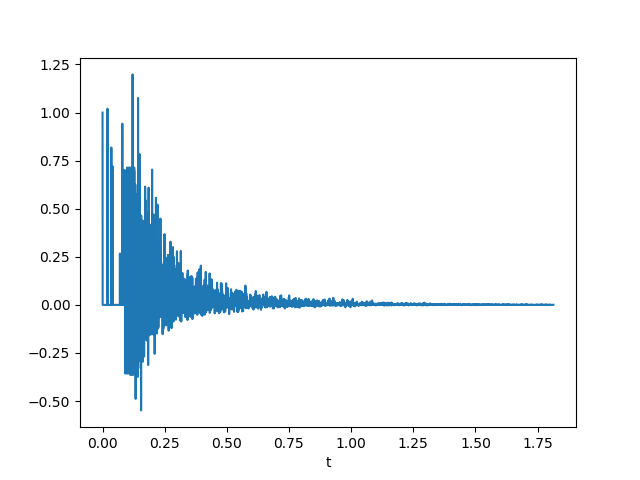

In [12]:
delta=np.zeros(20000)
delta[0]=1
plt.figure('Impulsni odziv reverberatora')
h=signal.lfilter(b,a,delta)
plt.plot(np.arange(len(h))/fs,signal.lfilter(b,a,delta))
plt.xlabel("t")
Audio(h,rate=fs)

16. Demonstrirati rad reverberatora na primjeru signala acoustic.wav.
Slusanjem uporedite dobijene rezultate sa signalima dobijenim na izlazima pojedinih blokova iz tacaka 5, 8 i 11. Komentarisite vasa
zapazanja. Testirajte realizovane funkcije i na drugim signalima i komentarisite rezultate.

a) Originalni signal acoustic.wav

In [13]:
Audio(x,rate=fs)

b) Prolazak kroz lcomb (blok iz tacke 5)

In [14]:
b,a=lcomb(0.24,0.83,600)  
y=signal.lfilter(b,a,x)
Audio(y,rate=fs)

Na grafiku amplitudske karakteristike IIR modifikovanog češljastog filtra uočavamo da su na višim učestanostima vrijednosti umanjene u odnosu na niže učestanosti, što znači da osim uloge češlja, ovaj filtar preuzima i ulogu NF filtra. 
Upravo ta osobina češljastog filtra može se osjetiti i u promjenama na acoustic.wav tj. vise frekvencije se u umanjene. 

c) Prolazak kroz allpass filtar (blok iz tacke 8)

In [15]:
b,a=all_pass(ag,ad)
y=signal.lfilter(b,a,x)
Audio(y,rate=fs)

d) Prolazak kroz liniju za kasnjenje (blok iz tacke 11)

In [16]:
b,a=tdl(lg,ld)
y=signal.lfilter(b,a,x)
Audio(y,rate=fs)

Na direktni zvuk dodane su i rane refleksije

e) Izlaz iz Murerovog reverberatora sa koeficijentima  iz tabele 

|'Izlaz'|'Kašnjenje[s]' | 'Koeficijent' |
|------|------|------|
|  0 |0|1.00|
|  1 |0.0199|1.02|
|  2 |0.0354|0.818|
|  3 |0.0389|0.635|
|  4 |0.0414|0.719|
|  5 |0.0699|0.267|
|  6 |0.0796|0.242|

In [17]:
b,a=moorer(lg,ld,cg,cg1,cd,ag,ad,d)
y=signal.lfilter(b,a,x)
Audio(y,rate=fs)

f) Izlaz Murerovog reverberatora sa koeficijentima  iz tabele (poželjniji koeficijenti) 

|'Izlaz'|'Kašnjenje[s]' | 'Koeficijent' |
|------|------|------|
|  0 |0|1.00|
|  1 |0.0043|0.841|
|  2 |0.0215|0.504|
|  3 |0.0225|0.491|
|  4 |0.0268|0.379|
|  5 |0.0270|0.380|
|  6 |0.0298|0.346|
|  7 |0.0458|0.289|
|  8 |0.0485|0.272|
|  9 |0.0572|0.192|
|  10 |0.0587|0.193|
|  11 |0.0595|0.217|
|  12 |0.0612|0.181|
|  13 |0.0707|0.180|
|  14 |0.0708|0.181|
|  15 |0.0726|0.176|
|  16 |0.0741|0.142|
|  17 |0.0753|0.167|
|  18 |0.0797|0.134|


<IPython.core.display.Javascript object>


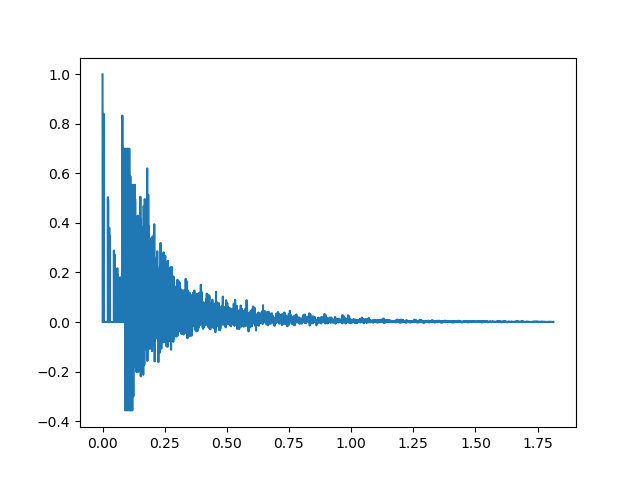

In [18]:
ld=fs*np.array([0,0.0043,0.0215,0.0225,0.0268,0.0270,0.0298,0.0458,0.0485,0.0572,0.0587,0.0595,0.0612,0.0707,0.0708,0.0726,0.0741,0.0753,0.0797])
lg=np.array([1.00,0.841,0.504,0.491,0.379,0.380,0.346,0.289,0.272,0.192,0.193,0.217,0.181,0.180,0.181,0.176,0.142,0.167,0.134])
ld=ld.astype(int)
ag=0.7
ad=67
d=ld[-1]-cd[0]
b,a=moorer(lg,ld,cg,cg1,cd,ag,ad,d)
y=signal.lfilter(b,a,x)
h=signal.lfilter(b,a,delta)
plt.figure('Impulsni odziv reverberatora1')
plt.plot(np.arange(len(h))/fs,h)
Audio(h,rate=fs)


In [19]:
Audio(y,rate=fs)

g) Prvih 80 ms impulsnog odziva katedrale koristim kao koeficijente linije kašnjenja. Cilj je da se dobije zvuk približan onom u katedrali korišćenjem Murerovog reverberatora

<IPython.core.display.Javascript object>


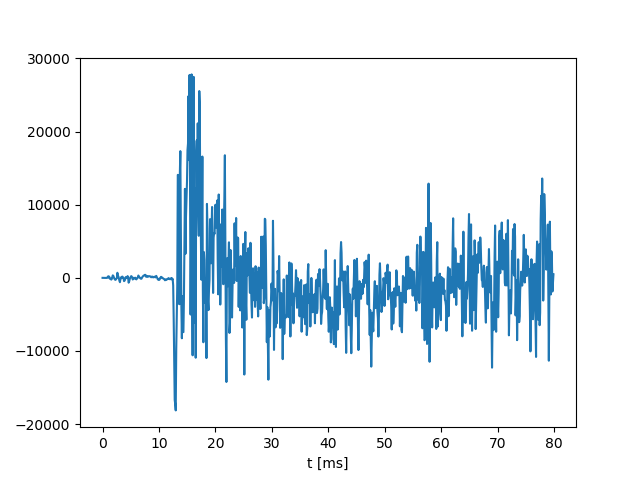

Text(0.5, 0, 't [ms]')

In [20]:
fs, h = wavfile.read('impulse_cathedral.wav')
ld=np.arange(int((80/1000)*fs))
lg=h[0: int((80/1000)*fs)]
d=ld[-1]-cd[0]
plt.figure('impulsni odziv katedrale (prvih 80ms)')
plt.plot(10**3*np.arange(len(lg)) / fs,lg)
plt.xlabel('t [ms]')

h) Impulsni odziv Murerovog reverberatora sa koeficijentima iz tacke g)

<IPython.core.display.Javascript object>


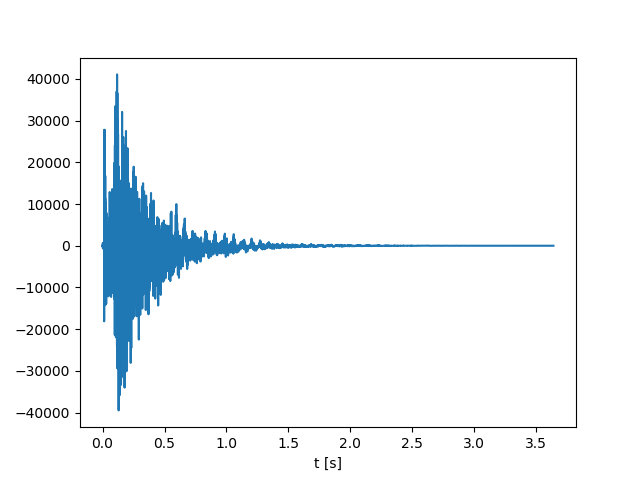

Text(0.5, 0, 't [s]')

In [21]:
b,a=moorer(lg,ld,cg,cg1,cd,ag,ad,d)
h1=signal.lfilter(b,a,np.concatenate(([1],np.zeros(len(h)))))
plt.figure('impulsni odziv Murerovog reverberatora')
plt.plot(np.arange(len(h1))/fs,h1)
plt.xlabel('t [s]')

i) Impulsni odziv katedrale

<IPython.core.display.Javascript object>


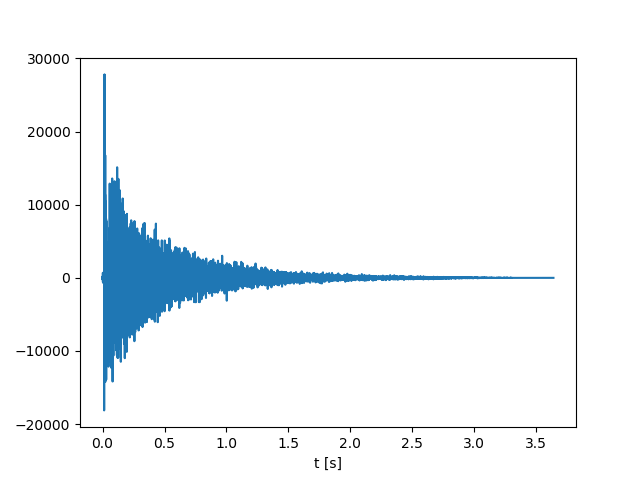

Text(0.5, 0, 't [s]')

In [22]:
plt.figure('Impulsni odziv katedrale')
plt.plot(np.arange(len(h))/fs,h)
plt.xlabel('t [s]')

j) Konvolucioni reverberator

In [23]:
y1 = signal.fftconvolve(x, h, mode='same')
Audio(y1,rate=fs)

k) Murerov reverberator

In [24]:
y=signal.lfilter(b,a,x)
Audio(y,rate=fs)

Zaključak: Nakon slušanja oba rezultata, zaključujem da su razlike u zvuku minimalne, ali impulsni odzivi katedrale i Murerovog reverberatora imaju određena odstupanja. Konvolucioni reverberator daje bolje rezultate. 

l) Na primjeru sa laba

In [25]:
fs, y = wavfile.read('sm.wav')
Audio(y,rate=fs)

Nakon Murerovog reverberatora

In [26]:
y1=signal.lfilter(b,a,y)
Audio(y1,rate=fs)

Konvulucioni reverberator

In [27]:
y3 = signal.fftconvolve(x, h, mode='same')
Audio(y1,rate=fs)